# Imports

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

# Load the data
# 2 Sierraleone

In [12]:
filepath=r"C:\ML and DS Files\Kifiya AI\week 0 data\togo-dapaong_qc.csv"
data = pd.read_csv(filepath)
data.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

# Basic Statistics

In [13]:
data.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

# Data check and cleaning

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [15]:
# List columns containing NaN values
columns_with_nan = data.columns[data.isnull().any()].tolist()
print(f'the column  {columns_with_nan}  has null value')

the column  ['Comments']  has null value


In [16]:
# Check for missing values
missing_summary = data.isnull().sum()
print("Missing Values Summary:")
print(missing_summary)

Missing Values Summary:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [17]:
#drop commnets column 
data.drop(columns=['Comments'], inplace = True)
data.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4  
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4  
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4  
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4  
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4

# check negative values and remove them on specific columns

In [47]:
# Check for negative values
negative_values = data[(data['GHI'] < 0) | (data['DNI'] < 0) | (data['DHI'] < 0)]
print("Rows with Negative Values:")
print(negative_values)

# Remove rows with negative values inplace
data.drop(index=negative_values.index, inplace=True)

# Verify the removal
print("Data after removing rows with negative values:")
print(data)



Rows with Negative Values:
Empty DataFrame
Columns: [GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, month, hour]
Index: []
Data after removing rows with negative values:
                     GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-25 05:43:00  0.0  0.0  0.6   1.2   1.2  25.2  92.7  1.8     2.1   
2021-10-25 05:44:00  0.2  0.0  0.7   1.4   1.4  25.2  92.7  1.4     1.9   
2021-10-25 05:45:00  0.5  0.0  0.8   1.6   1.6  25.2  92.8  1.5     1.9   
2021-10-25 05:46:00  0.8  0.0  0.9   1.9   1.9  25.2  92.6  1.6     2.1   
2021-10-25 05:47:00  1.0  0.0  1.0   2.1   2.1  25.1  92.5  1.6     1.9   
...                  ...  ...  ...   ...   ...   ...   ...  ...     ...   
2022-10-24 23:45:00  0.2  0.0  0.0   0.0   0.0  25.1  58.9  0.0     0.0   
2022-10-24 23:46:00  0.2  0.0  0.0   0.0   0.0  25.1  57.3  0.0     0.0   
2022-10-24 23

In [19]:
# Check for negative values
negative_values = data[(data['GHI'] < 0) | (data['DNI'] < 0) | (data['DHI'] < 0) ]
print("Rows with Negative Values:")
print(negative_values)

Rows with Negative Values:
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []


# outliers in 'ModA', 'ModB', 'WS', 'WSgust'
Any value smaller than the lower boundary or larger than the upper boundary is an outlier. Calculate the Q1 (25th percentile) and Q3 (75th percentile) of the data

In [20]:
# ['ModA', 'ModB', 'WS', 'WSgust']
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outliers_count': len(outliers),
            'outliers': outliers
        }
    return outlier_info

# Columns to check
columns_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# Detect outliers
outliers_info = detect_outliers_iqr(data, columns_to_check)

# Display outlier details
for col, info in outliers_info.items():
    print(f"Column: {col}")
    print(f"Lower Bound: {info['lower_bound']}, Upper Bound: {info['upper_bound']}")
    print(f"Number of Outliers: {info['outliers_count']}")
    print(f"Outliers:\n{info['outliers']}\n")


Column: ModA
Lower Bound: -739.6000000000001, Upper Bound: 1617.2
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []

Column: ModB
Lower Bound: -713.8500000000001, Upper Bound: 1564.95
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []

Column: WS
Lower Bound: -0.9499999999999997, Upper Bound: 6.6499999999999995
Number of Outliers: 2668
Outliers:
               Timestamp   GHI   DNI   DHI  ModA  ModB  Tamb    RH   WS  \
16808   2021-11-05 16:09  49.0   0.0  47.7  50.4  47.4  33.4  41.4  7.3   
16809   2021-11-05 16:10  50.5   0.0  49.1  51.7  48.7  33.3  41.8  8.2   
16855   2021-11-05 16:56  29.6   0.0  32.4  30.4  28.9  32.4  43.3  8.5   
16856   2021-11-05 16:57  28.6   0.0  31.3  29.3  27.8  32.3  44.5 

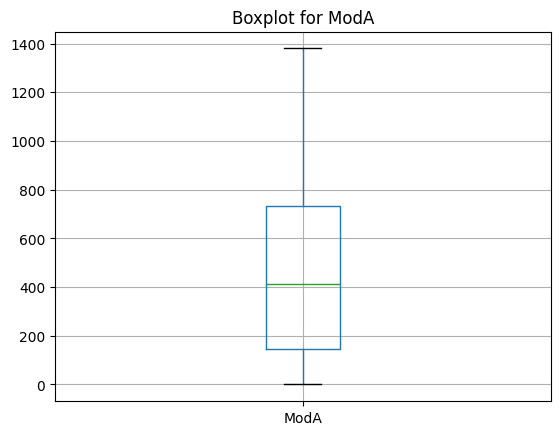

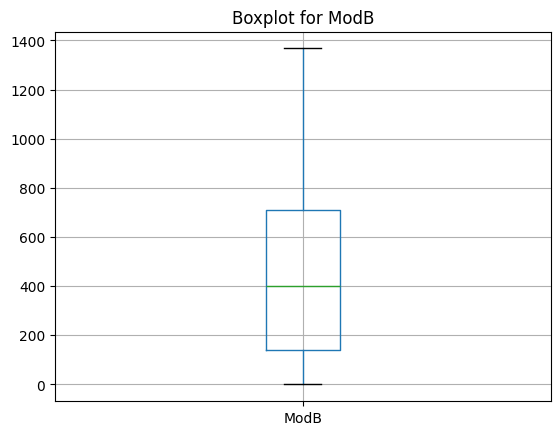

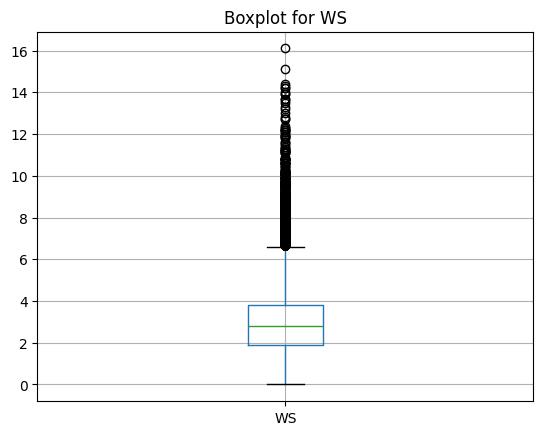

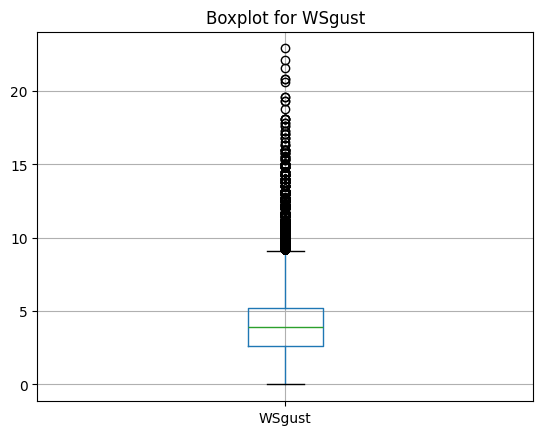

In [21]:
# visualize outliers in Boxplots
for col in columns_to_check:
    plt.figure()
    data.boxplot(column=col)
    plt.title(f"Boxplot for {col}")
    plt.show()


Replace outliers with the median of the column:

In [22]:
# the assignment data[col] = ... directly overwrites the column in the DataFrame.
for col in columns_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[col].median()
    data[col] = data[col].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

data.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
342  2021-10-25 05:43  0.0  0.0  0.6   1.2   1.2  25.2  92.7  1.8     2.1   
343  2021-10-25 05:44  0.2  0.0  0.7   1.4   1.4  25.2  92.7  1.4     1.9   
344  2021-10-25 05:45  0.5  0.0  0.8   1.6   1.6  25.2  92.8  1.5     1.9   
345  2021-10-25 05:46  0.8  0.0  0.9   1.9   1.9  25.2  92.6  1.6     2.1   
346  2021-10-25 05:47  1.0  0.0  1.0   2.1   2.1  25.1  92.5  1.6     1.9   

     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
342      0.3  225.4      4.8  977         0            0.0   25.0   24.8  
343      0.4  231.2      5.8  977         0            0.0   25.0   24.7  
344      0.4  229.9      7.9  977         0            0.0   25.0   24.7  
345      0.4  230.1      7.0  977         0            0.0   25.0   24.7  
346      0.4  230.0      7.0  977         0            0.0   25.0   24.7

# Time Series Analysis

In [23]:
# Ensure the 'timestamp' column is in datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Add time-based features

data['month'] = data['Timestamp'].dt.month
data['hour'] = data['Timestamp'].dt.hour

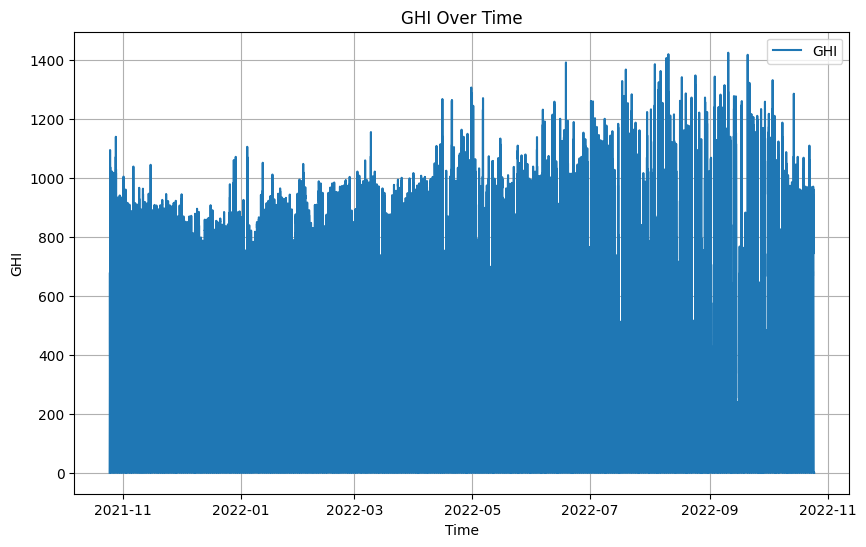

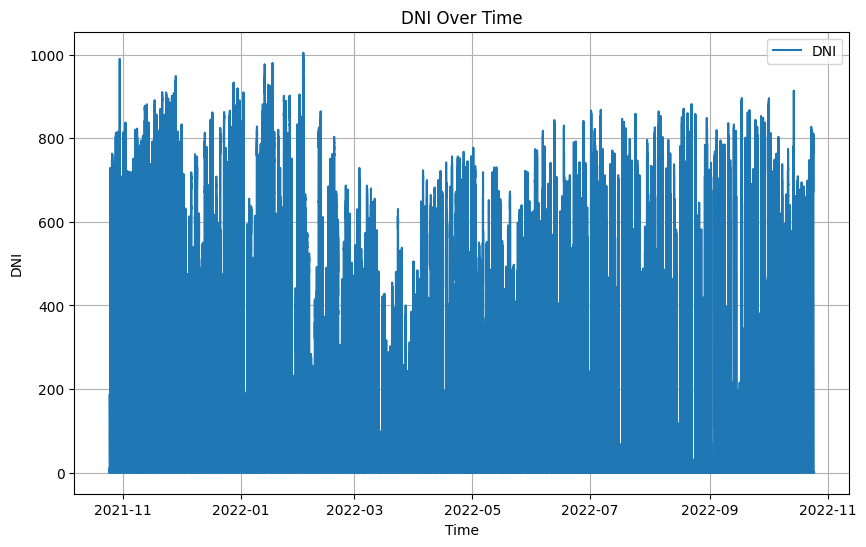

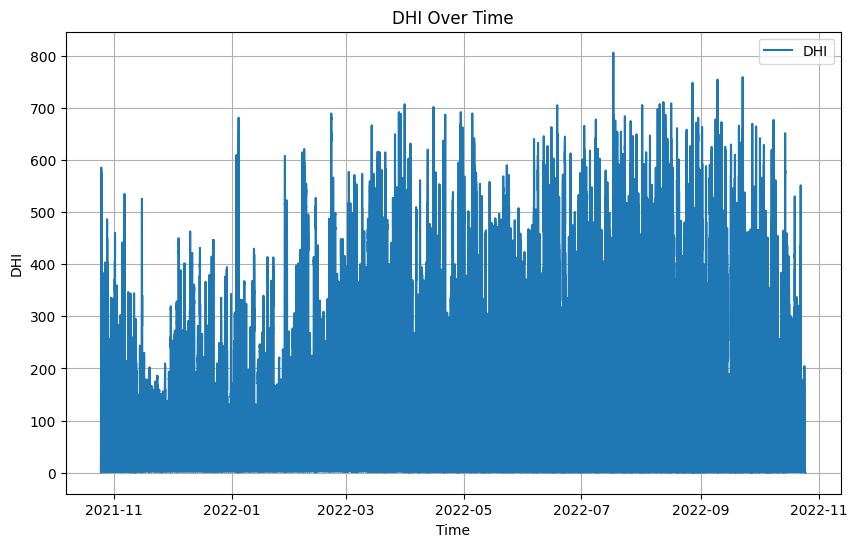

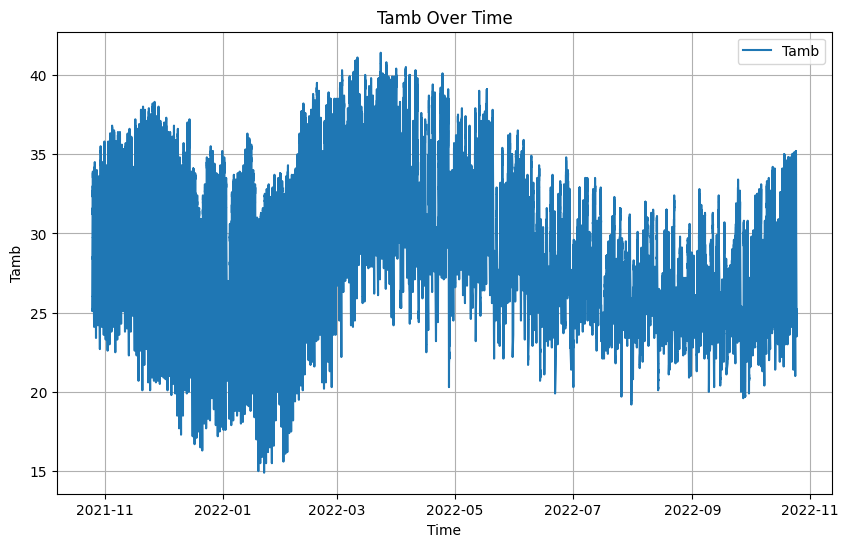

In [24]:
# Set the timestamp as the index for easier plotting
data.set_index('Timestamp', inplace=True)

# Plot line charts for GHI, DNI, DHI, and Tamb
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[col], label=col)
    plt.title(f"{col} Over Time")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.legend()
    plt.grid()
    plt.show()


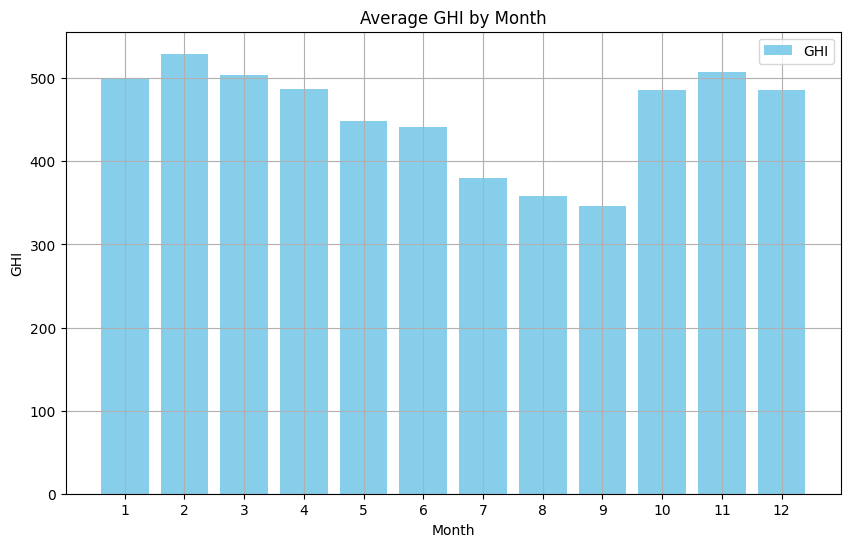

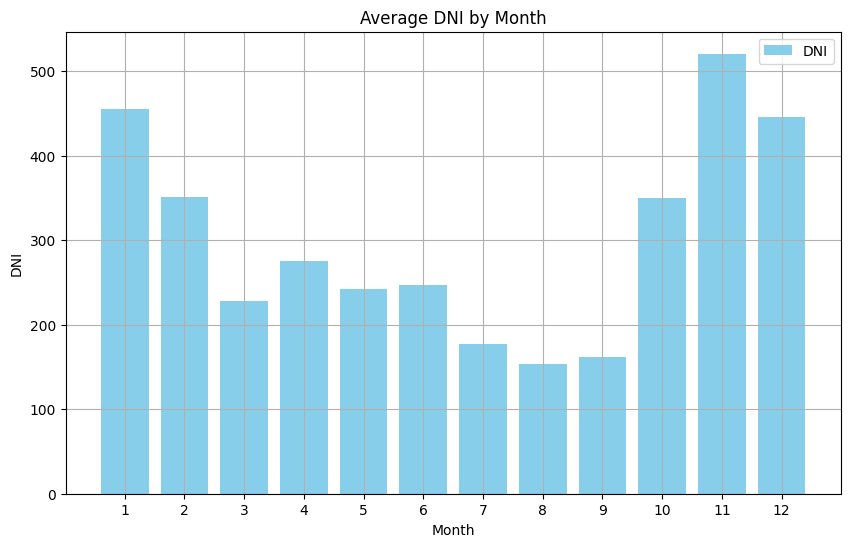

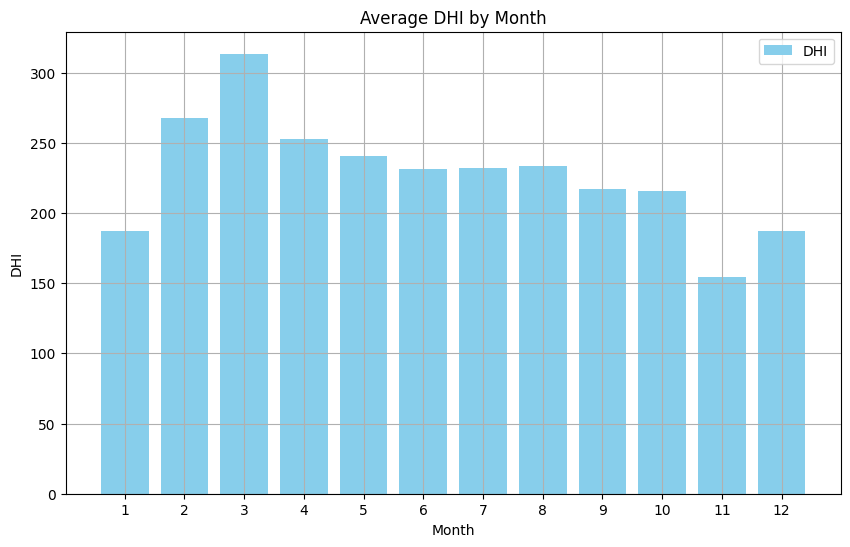

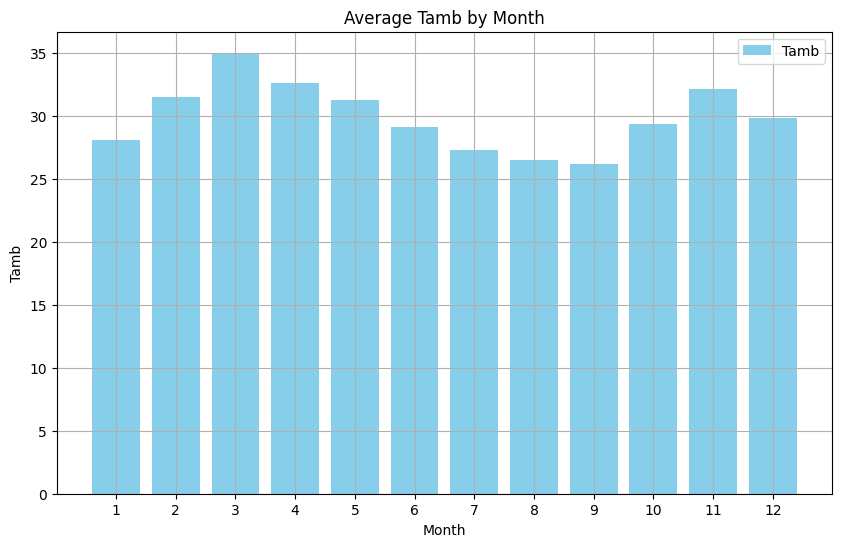

In [25]:
# Monthly averages
monthly_data = data.groupby('month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot bar charts
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_data.index, monthly_data[col], color='skyblue', label=col)
    plt.title(f"Average {col} by Month")
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.xticks(monthly_data.index)  
    plt.legend()
    plt.grid()
    plt.show()


#  Correlation Analysis

In [26]:
columns_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
data_c = data[columns_of_interest]

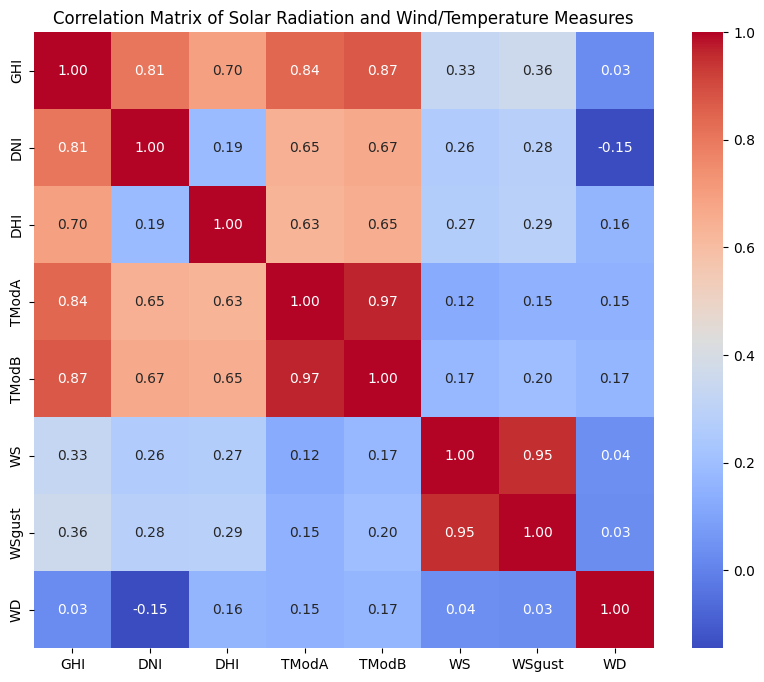

In [27]:
# Compute correlation matrix
corr_matrix = data_c.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Solar Radiation and Wind/Temperature Measures")
plt.show()


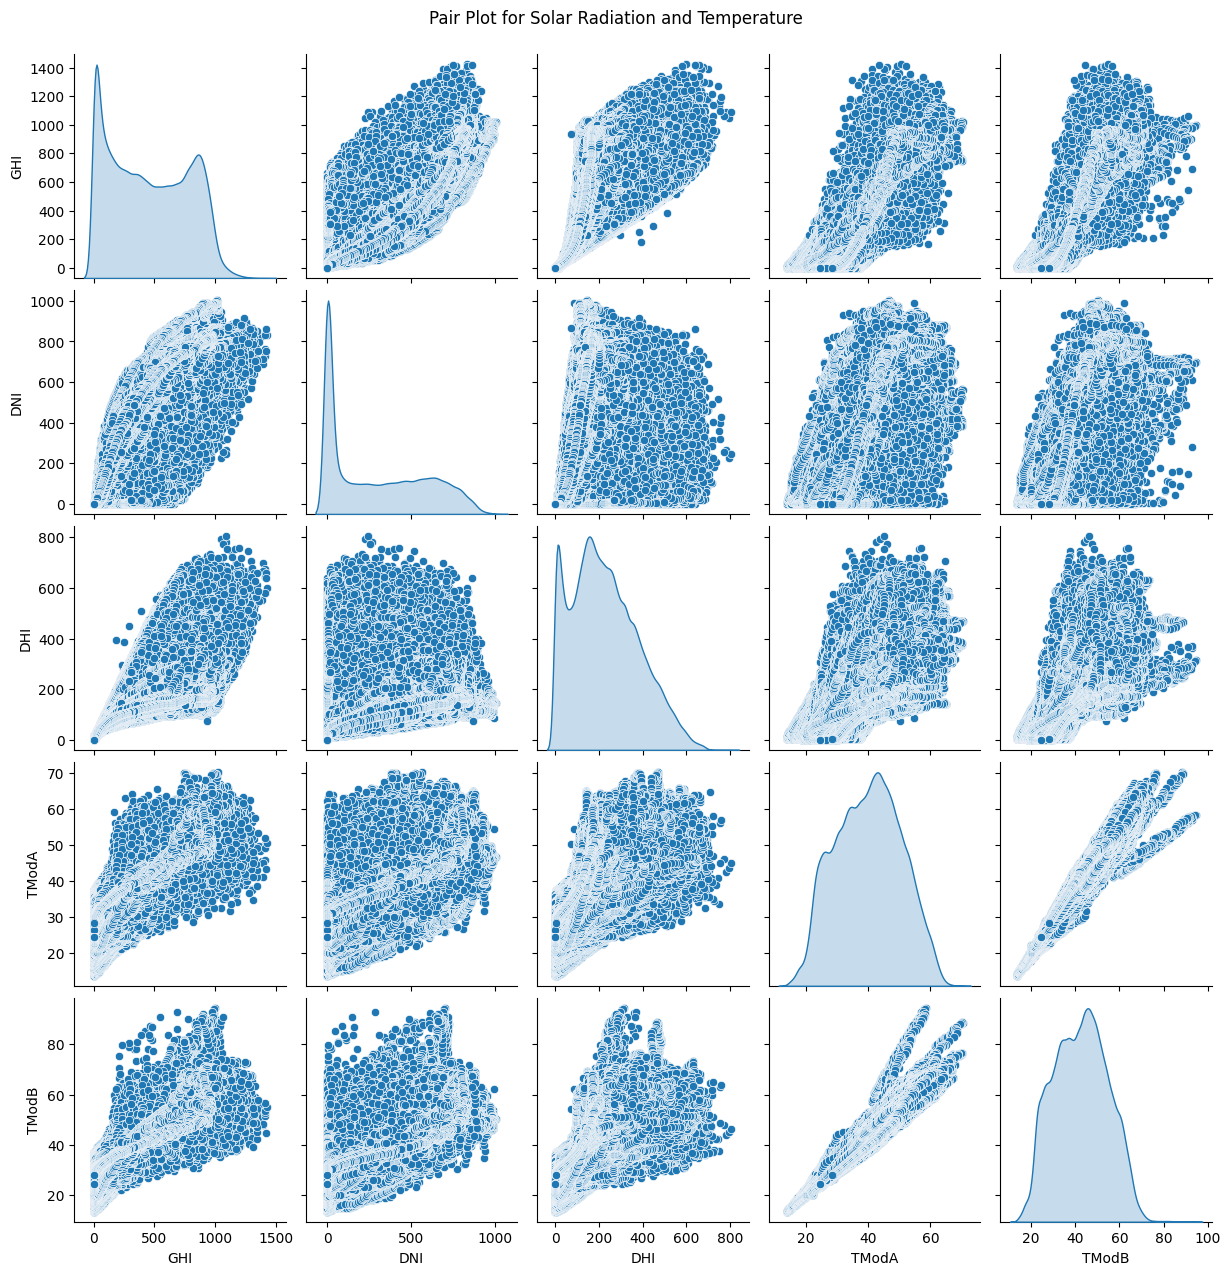

In [28]:
# Pair plot for solar radiation and temperature measures
sns.pairplot(data_c[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']], diag_kind='kde')
plt.suptitle("Pair Plot for Solar Radiation and Temperature", y=1.02)
plt.show()


In [29]:
# Investigate Relationships Between Specific Variables

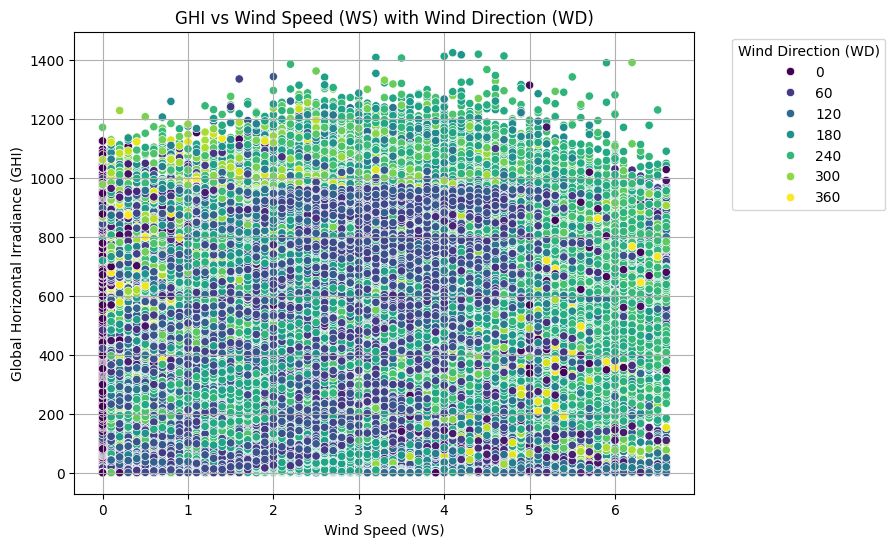

In [30]:
# GHI vs WS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WS', y='GHI', data=data_c, hue='WD', palette='viridis')
plt.title("GHI vs Wind Speed (WS) with Wind Direction (WD)")
plt.xlabel("Wind Speed (WS)")
plt.ylabel("Global Horizontal Irradiance (GHI)")
plt.legend(title='Wind Direction (WD)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


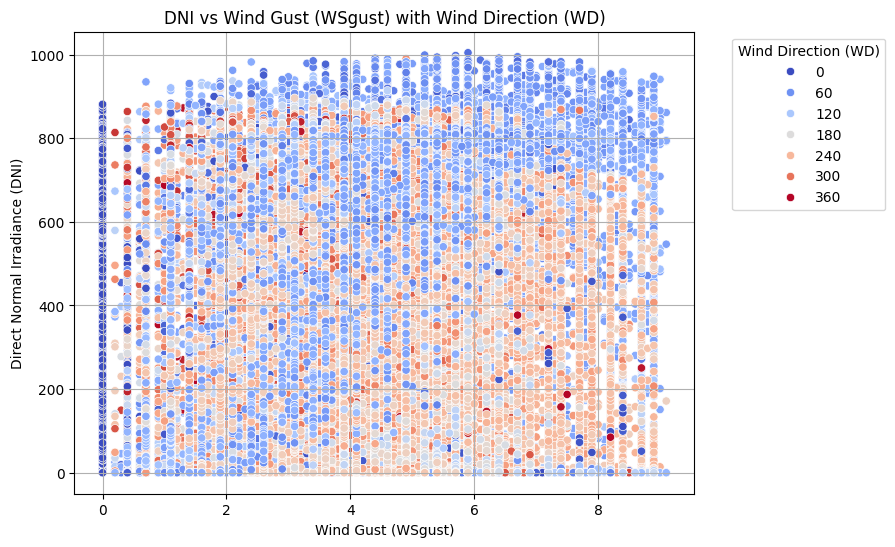

In [31]:
# DNI vs WSgust
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WSgust', y='DNI', data=data_c, hue='WD', palette='coolwarm')
plt.title("DNI vs Wind Gust (WSgust) with Wind Direction (WD)")
plt.xlabel("Wind Gust (WSgust)")
plt.ylabel("Direct Normal Irradiance (DNI)")
plt.legend(title='Wind Direction (WD)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


# Wind Analysis

In [32]:
# Filter data for wind speed and direction, drop missing values
data_w = data[['WS', 'WD']].dropna()

# Normalize wind direction (degrees are typically between 0 and 360)
wind_speed = data_w['WS'].values
wind_direction = data_w['WD'].values

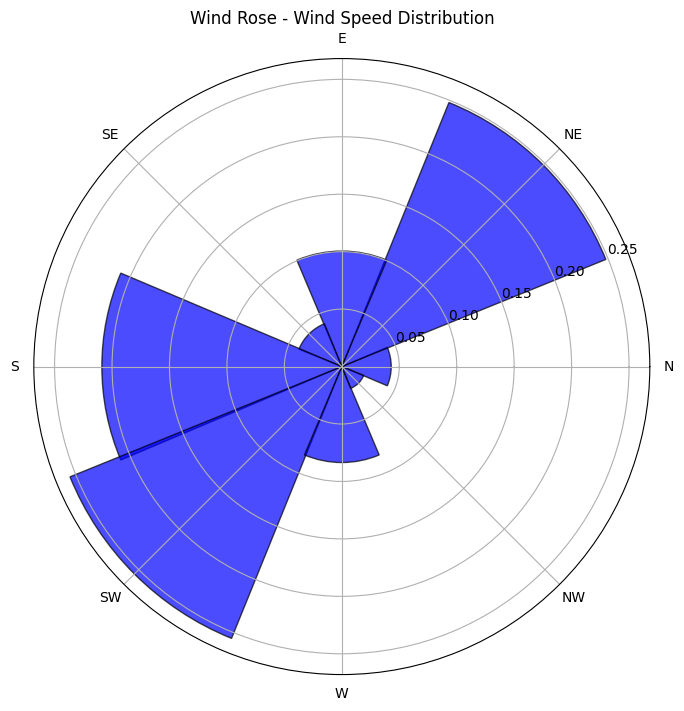

In [33]:
# Bin wind directions into 8 sectors
bins = np.arange(0, 360 + 45, 45)  # 8 bins, 45° each
wind_dir_bin = np.digitize(wind_direction, bins, right=False)

# Aggregate wind speed within each wind direction bin
wind_speed_sum = np.zeros(len(bins) - 1)
for i in range(1, len(bins)):
    wind_speed_sum[i - 1] = wind_speed[wind_dir_bin == i].sum()

# Normalize wind speed for plotting purposes
wind_speed_sum /= wind_speed_sum.sum()  # Normalize to proportions
angles = np.linspace(0, 2 * np.pi, len(wind_speed_sum), endpoint=False)

# Plotting the wind rose
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Plot radial bars for wind speeds
bars = ax.bar(angles, wind_speed_sum, align='center', color='b', alpha=0.7)

# Use wind rose radial ticks
for bar in bars:
    bar.set_edgecolor("black")  # Add edges to distinguish sections

# Set labels for cardinal directions
ax.set_xticks(np.linspace(0, 2 * np.pi, len(bins) - 1, endpoint=False))
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

# Display wind speed proportions
plt.title('Wind Rose - Wind Speed Distribution')
plt.show()


# Temperature Analysis

In [34]:
# Columns of interest
columns_of_interest = ['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']

# Drop rows with missing values in these columns
data_t = data[columns_of_interest].dropna()

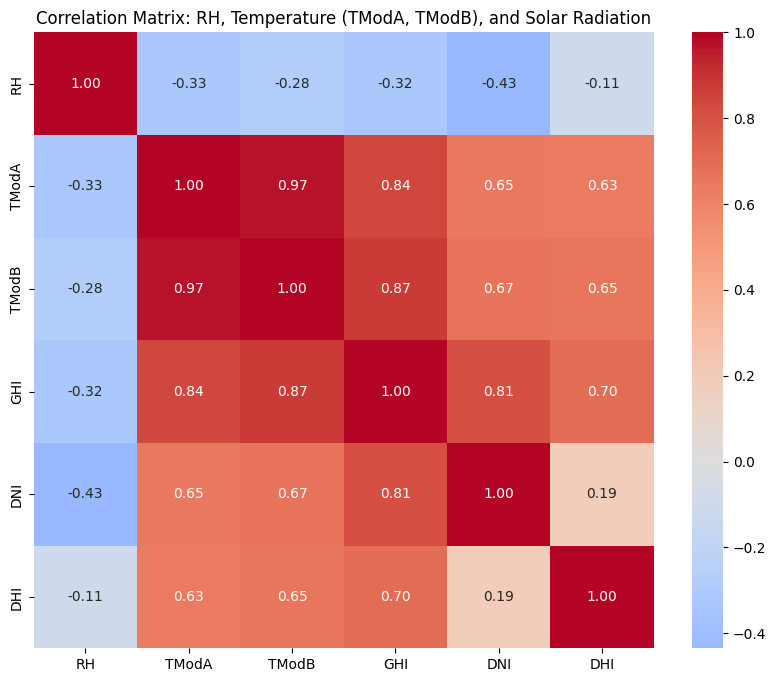

In [35]:
# Compute the correlation matrix
correlation_matrix = data_t.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Matrix: RH, Temperature (TModA, TModB), and Solar Radiation")
plt.show()


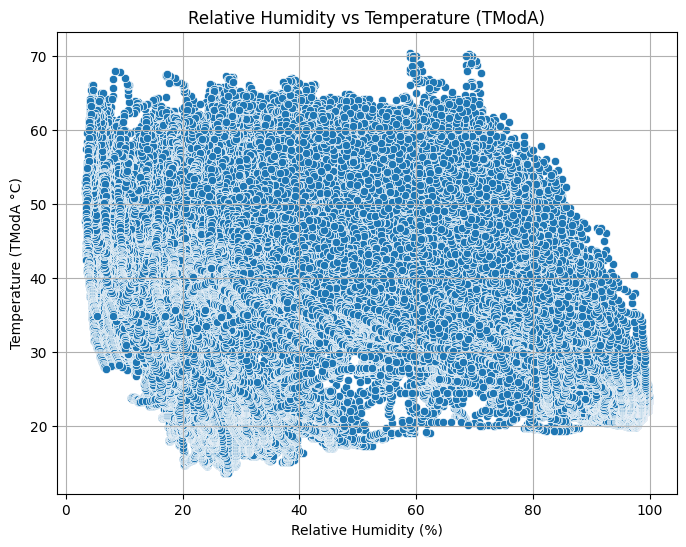

In [36]:
# RH vs TModA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RH', y='TModA', data=data_t)
plt.title("Relative Humidity vs Temperature (TModA)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (TModA °C)")
plt.grid()
plt.show()


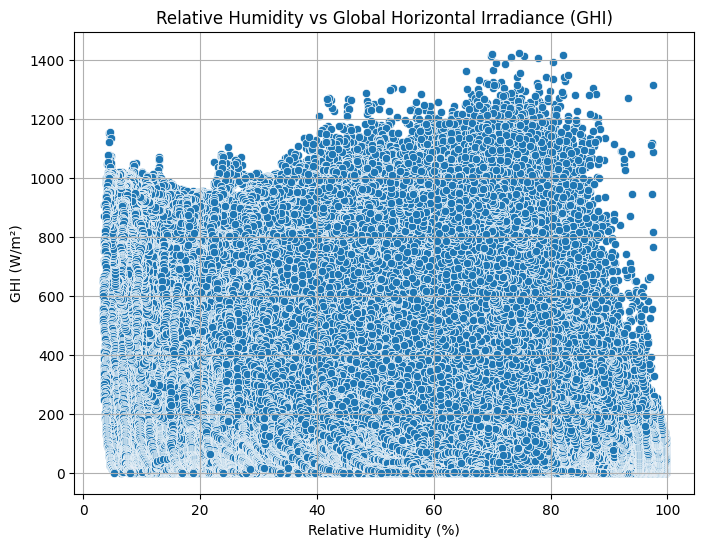

In [37]:
# RH vs GHI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RH', y='GHI', data=data_t)
plt.title("Relative Humidity vs Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.grid()
plt.show()


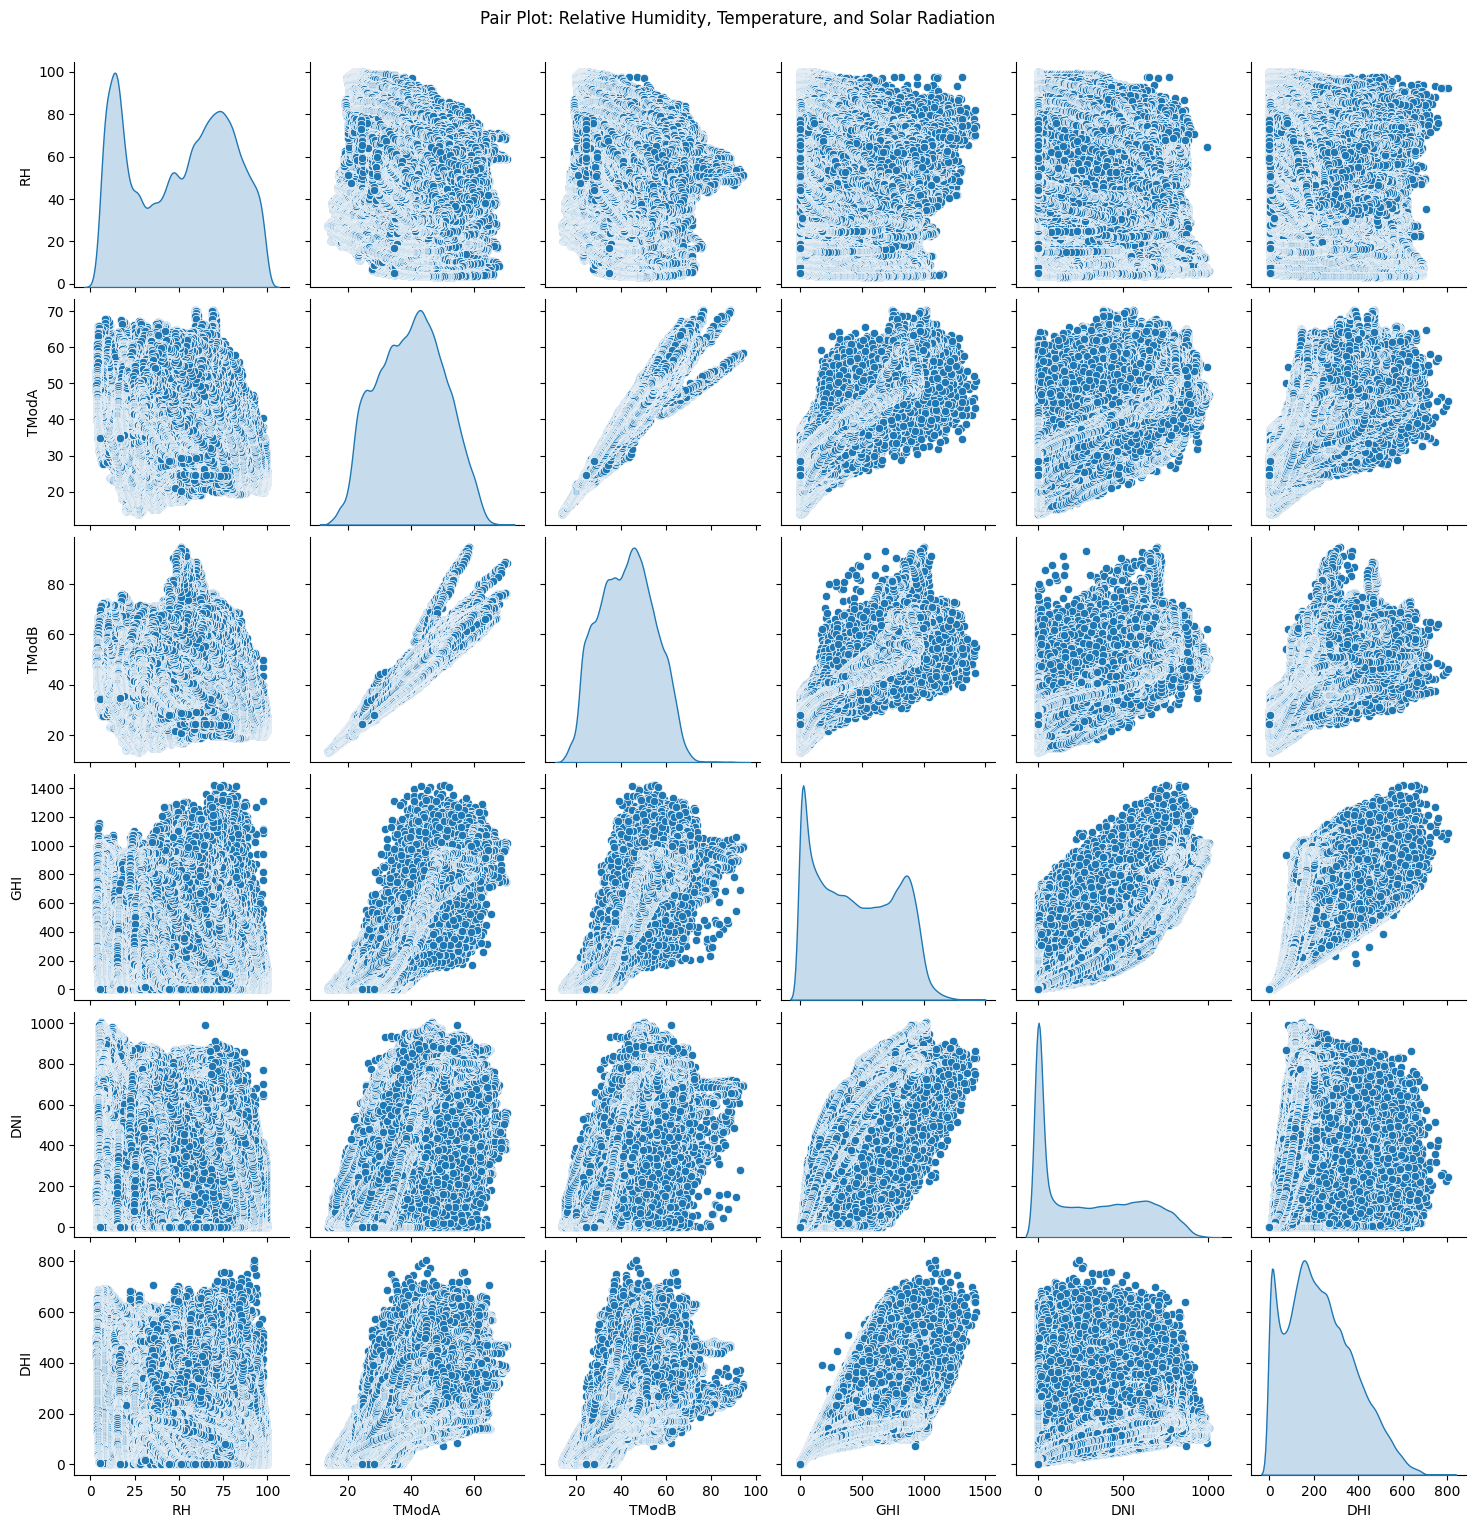

In [38]:
# Pair plot for RH, temperature readings, and solar radiation
sns.pairplot(data_t[['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']], diag_kind='kde')
plt.suptitle("Pair Plot: Relative Humidity, Temperature, and Solar Radiation", y=1.02)
plt.show()


# Histograms

In [39]:

# Select columns of interest and drop missing values
variables_of_interest = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']
data_h = data[variables_of_interest].dropna()


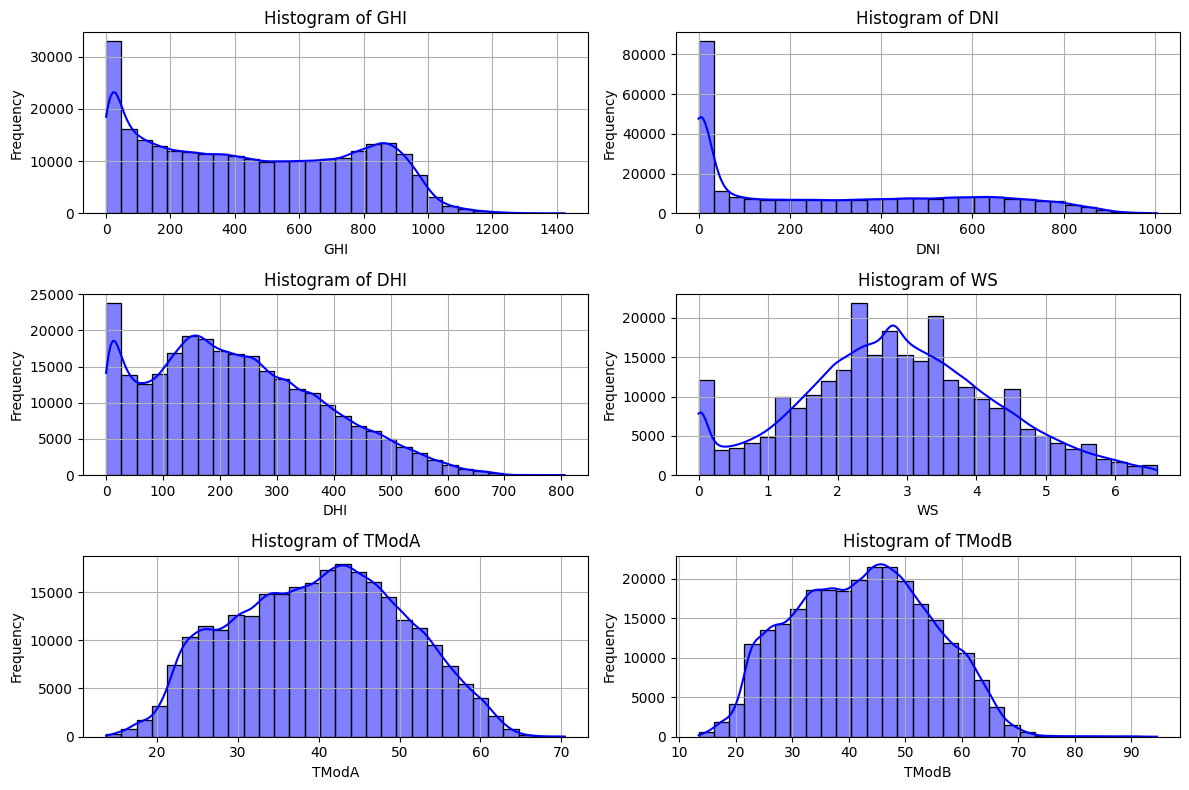

In [40]:
plt.figure(figsize=(12, 8))

# Plot histograms
for i, col in enumerate(variables_of_interest, 1):
    plt.subplot(3, 2, i)  # Create a subplot for each variable
    sns.histplot(data_h[col], kde=True, color='blue', bins=30, edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()

plt.tight_layout()
plt.show()



# Z-score analysis

In [41]:
# Columns to analyze for Z-score analysis
columns_to_check = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']

In [42]:
# Manually compute Z-scores
z_scores_df = pd.DataFrame()
for col in columns_to_check:
    mean = data[col].mean()
    std = data[col].std()
    z_scores_df[col] = (data[col] - mean) / std

# Flagging values with |Z-score| > 3
outliers = (z_scores_df.abs() > 3)


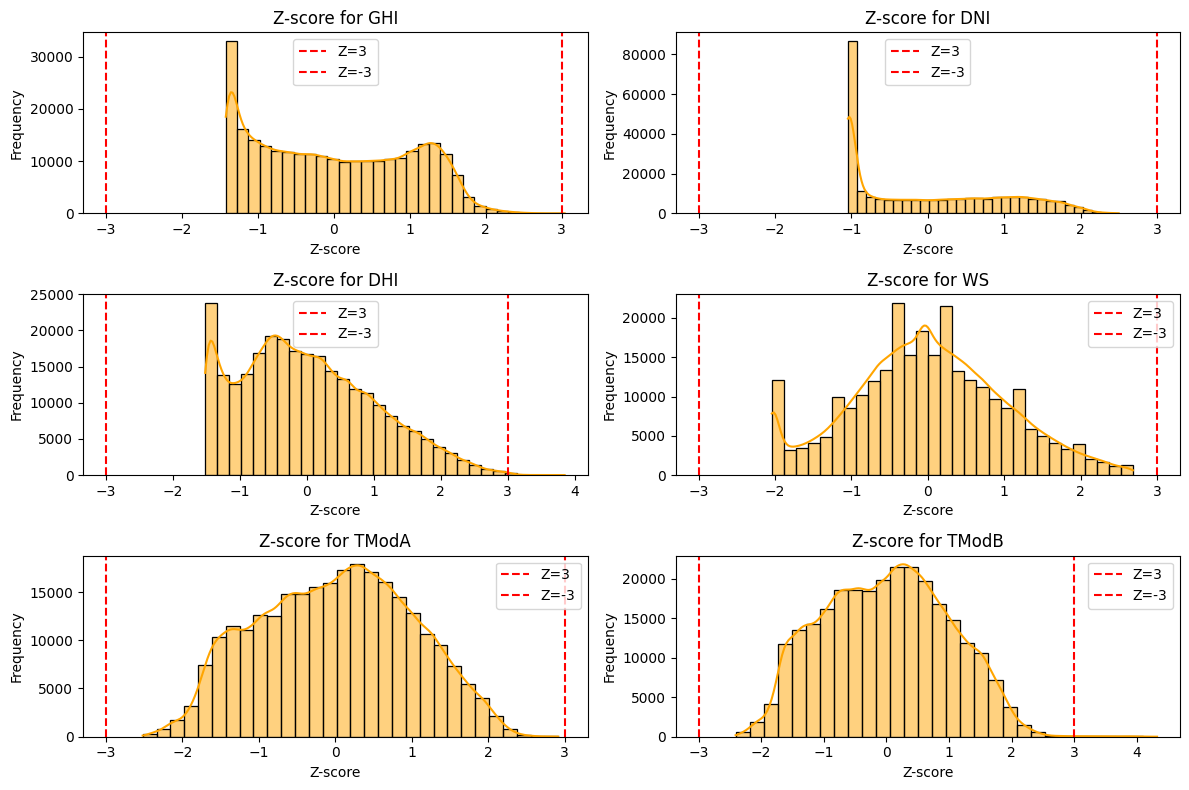

In [43]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 2, i)
    sns.histplot(z_scores_df[col], kde=True, bins=30, color='orange')
    plt.axvline(x=3, color='red', linestyle='dashed', label='Z=3')
    plt.axvline(x=-3, color='red', linestyle='dashed', label='Z=-3')
    plt.title(f"Z-score for {col}")
    plt.xlabel("Z-score")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

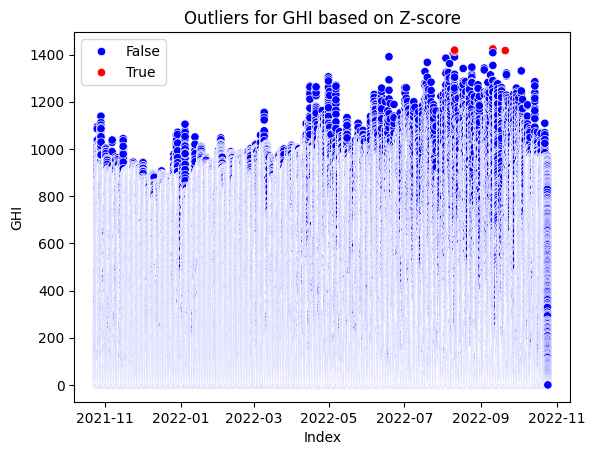

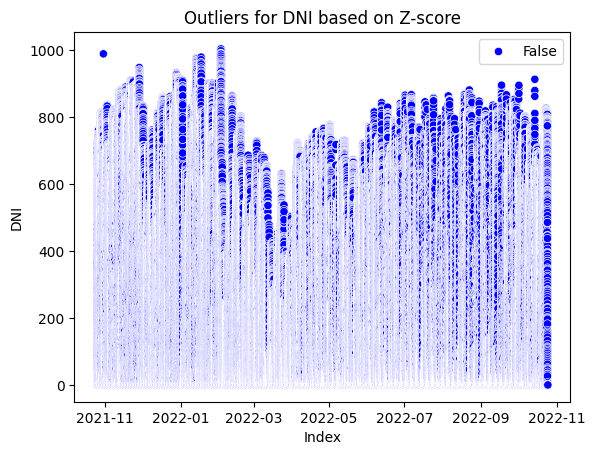

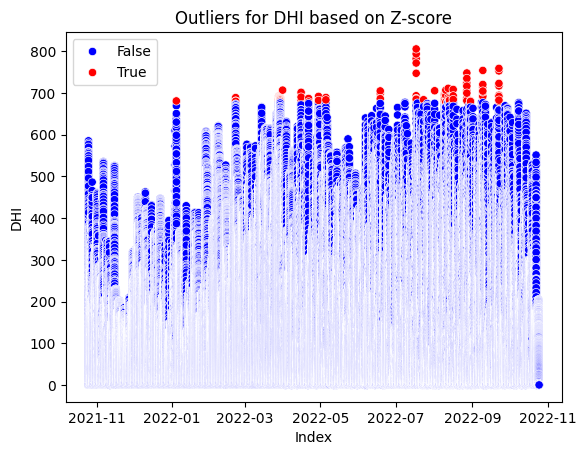

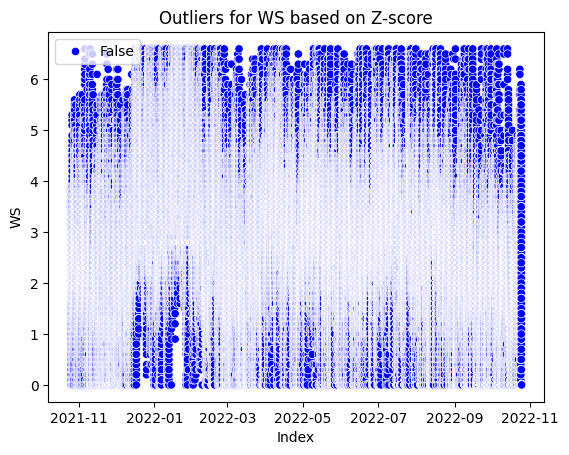

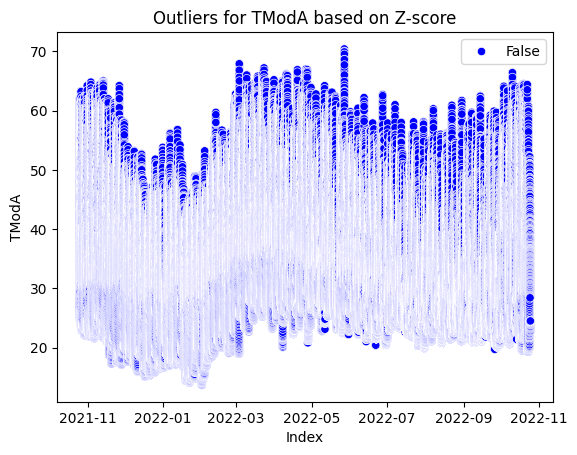

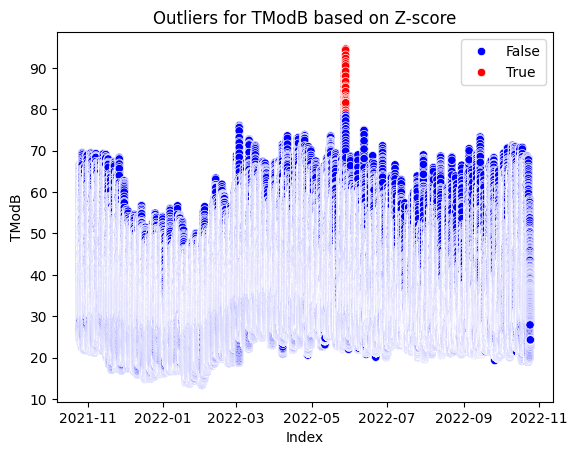

In [44]:
#Identify and Visualize Outliers
plt.figure(figsize=(10, 6))

for col in columns_to_check:
    plt.figure()
    sns.scatterplot(x=data.index, y=data[col], hue=outliers[col], palette={True: 'red', False: 'blue'})
    plt.title(f"Outliers for {col} based on Z-score")
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    plt.show()


# Z score bubble


In [45]:
columns_of_interest = ['GHI', 'Tamb', 'WS', 'RH', 'BP']
data_b = data[columns_of_interest].dropna()  # Drop missing values

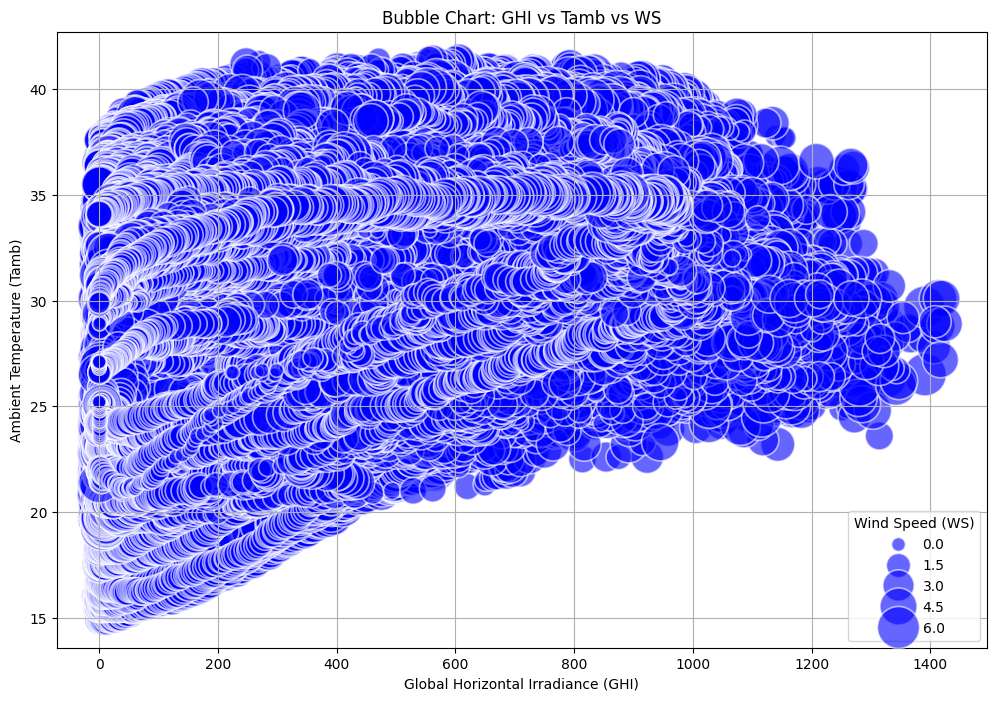

In [46]:
# GHI vs Tamb vs WS (bubble size)
# Create a bubble chart
plt.figure(figsize=(12, 8))

# Plot data
sns.scatterplot(
    x='GHI',
    y='Tamb',
    size='WS',
    sizes=(100, 1000),  # Adjust range of bubble sizes
    alpha=0.6,
    data=data_b,
    color='b',
)

# Add labels and title
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('Bubble Chart: GHI vs Tamb vs WS')
plt.legend(title="Wind Speed (WS)", loc='best')
plt.grid()
plt.show()
